In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

plt.rcParams['figure.figsize']        = 6., 4.
plt.rcParams['axes.labelsize']        = 18
plt.rcParams['axes.titlesize']        = 18
plt.rcParams['xtick.top']             = True
plt.rcParams['xtick.bottom']          = True
plt.rcParams['ytick.left']            = True
plt.rcParams['ytick.right']           = True
plt.rcParams['xtick.direction']       = 'in'
plt.rcParams['ytick.direction']       = 'in'
plt.rcParams['xtick.labelsize']       = 18
plt.rcParams['ytick.labelsize']       = 18
plt.rcParams['xtick.major.pad']       = 6.
plt.rcParams['xtick.minor.pad']       = 6.
plt.rcParams['ytick.major.pad']       = 6.
plt.rcParams['ytick.minor.pad']       = 6.
plt.rcParams['xtick.major.size']      = 6. # major tick size in points
plt.rcParams['xtick.minor.size']      = 3. # minor tick size in points
plt.rcParams['ytick.major.size']      = 6. # major tick size in points
plt.rcParams['ytick.minor.size']      = 3. # minor tick size in points
plt.rcParams['text.usetex']           = False
plt.rcParams['font.family']           = 'serif'
#plt.rcParams['font.serif']            = 'Computer Modern Roman Bold'
plt.rcParams['font.size']             = 18


# Look at dataset

In [2]:
with h5py.File("../data/dataset.h5", "r") as hf:
    x = hf['x'][:]
    y = hf['y'][:]
    x_min, x_max = hf['x_min'][0], hf['x_max'][0]
    y_min, y_max = hf['y_min'][0], hf['y_max'][0]
    
y = np.clip(y, y_min, y_max)
x = np.clip(x, x_min, x_max)

# Make some simple data plots

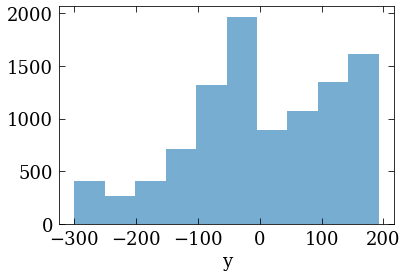

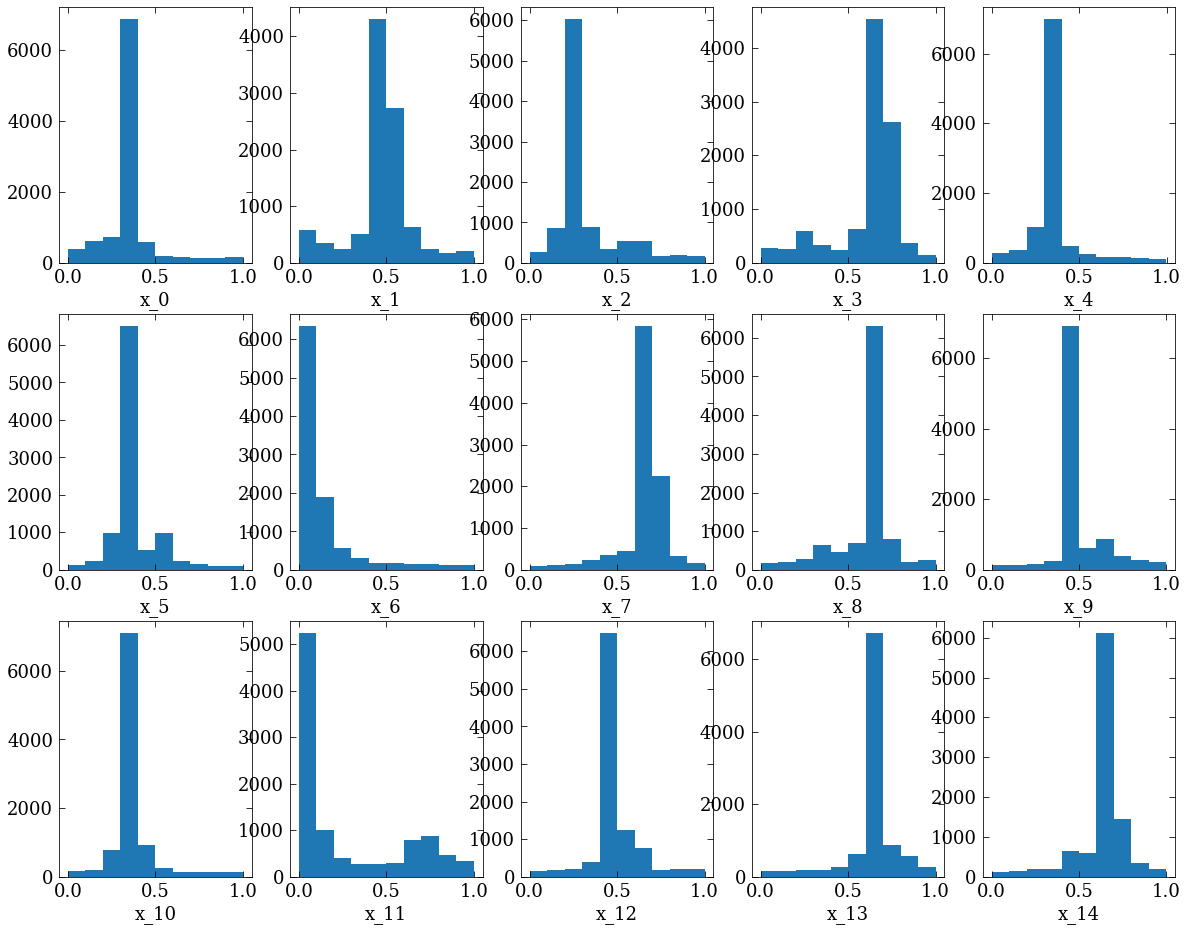

In [3]:
import math
def sigmoid(z):
    return 1./(1+np.exp(-z))

ymin, ymax = np.min(y), np.max(y)
ymean, ystd = np.mean(y), np.std(y)

plt.figure()
plt.hist(y.flatten(), alpha=0.6)
plt.xlabel("y")

# plt.figure()
# plt.hist(-1 + 2*(y.flatten() - ymin)/(ymax-ymin), alpha=0.6)
# plt.xlabel("y_norm")


nx = 5
ny = math.ceil(x.shape[1] / nx)
fig, ax = plt.subplots(ny, nx, figsize=(20,16))
for i in range(x.shape[1]):
    ix = i % nx
    iy = i // nx
    ax[iy, ix].hist(x[:, i])
    ax[iy, ix].set_xlabel(f'x_{i}')
# plt.xscale('symlog')

xmin, xmax = np.min(x, axis=0), np.max(x, axis=0)
xmean, xstd = np.mean(x, axis=0), np.std(x, axis=0)

# print(xmin, xmax)
# fig, ax = plt.subplots(ny, nx, figsize=(20,16))
# for i in range(x.shape[1]):
#     ix = i % nx
#     iy = i // nx
#     ax[iy, ix].hist(-1 + 2*(x[:, i] - xmin[i])/(xmax[i]-xmin[i]), alpha=0.6)
#     # ax[iy, ix].hist((x[:, i] - xmean[i])/(xstd[i]), alpha=0.6)


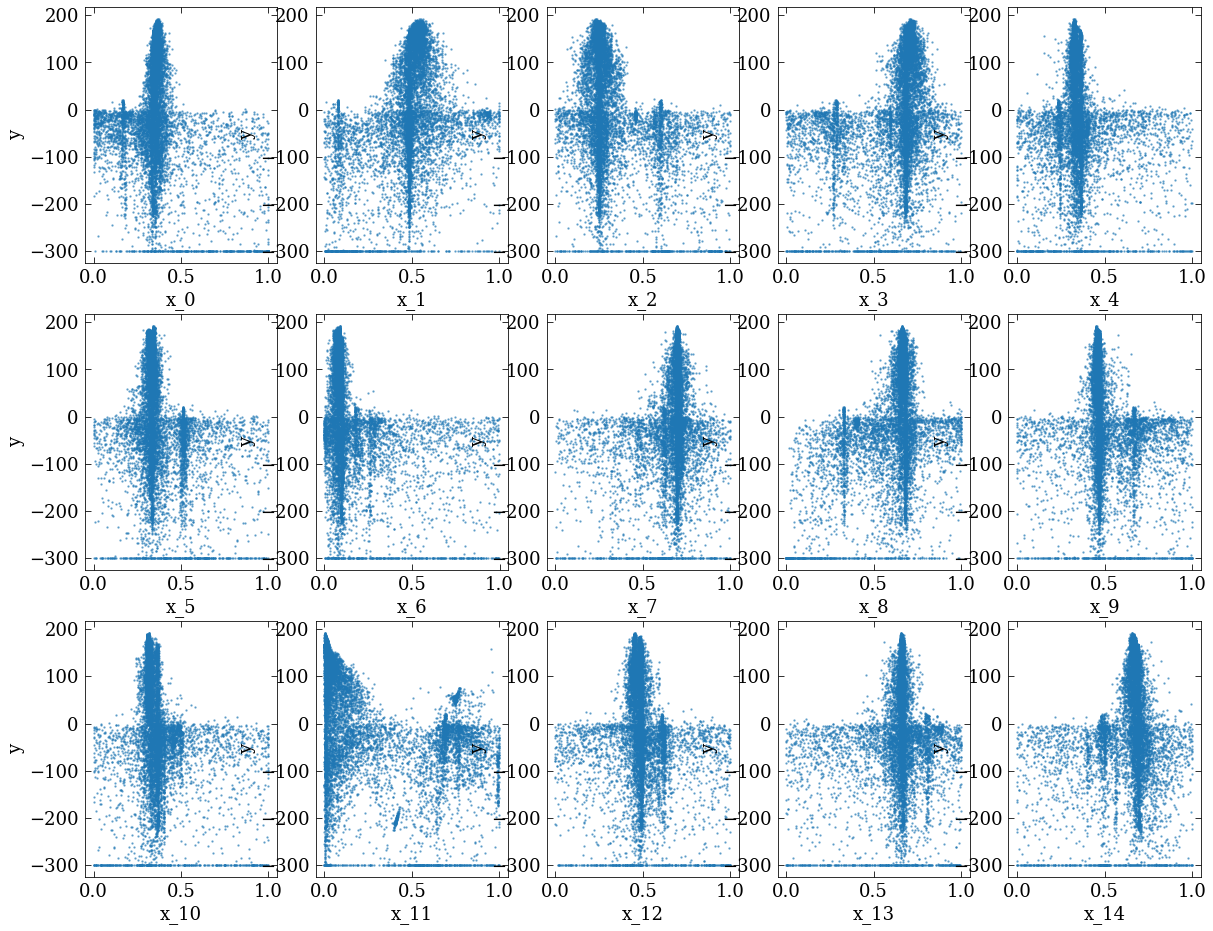

In [4]:
nx = 5
ny = math.ceil(x.shape[1] / nx)
fig, ax = plt.subplots(ny, nx, figsize=(20,16))
for i in range(x.shape[1]):
    ix = i % nx
    iy = i // nx
    ax[iy, ix].scatter(x[:, i], y.flatten(), alpha=0.5, s=2)
    # ax[iy, ix].hist(x[:, i])
    ax[iy, ix].set_xlabel(f'x_{i}')
    ax[iy, ix].set_ylabel('y')

# plt.xscale('symlog')

xmin, xmax = np.min(x, axis=0), np.max(x, axis=0)
xmean, xstd = np.mean(x, axis=0), np.std(x, axis=0)


# Look at trained models

In [43]:
from src import mlp
from src import data_module


ckpt_file_path = "../experiments/model_256_256_256_256/epoch=498-train_loss=0.00001.ckpt"

model = mlp.MLP.load_from_checkpoint(ckpt_file_path)

dataset = data_module.Dataset(
    model.hparams['val_path'],
)

In [44]:
import torch 

data_path = '../data/dataset.h5'

with h5py.File(data_path, 'r') as hf:
    print(hf.keys())
    x = hf['x'][:]
    y = hf['y'][:].flatten()

y = np.clip(y, y_min, y_max)
x = np.clip(x, x_min, x_max)

x = dataset.scale_x(x)
# y = dataset.scale_y(y)

y_pred = model(torch.tensor(x)).detach().numpy().flatten()
y_pred = dataset.scale_y(y_pred, inv=True)

<KeysViewHDF5 ['x', 'x_max', 'x_min', 'y', 'y_max', 'y_min']>


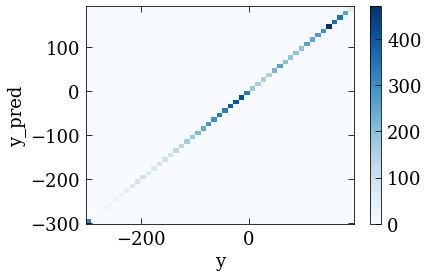

In [45]:
ymin = min(np.concatenate([y, y_pred]))
ymax = max(np.concatenate([y, y_pred]))

bins = np.linspace(ymin-1, ymax+1, 50)

plt.hist2d(y, y_pred, cmap=plt.cm.Blues, bins=bins);
plt.xlabel('y')
plt.ylabel('y_pred')
plt.colorbar()

(-300.6264343261719, 192.5861053466797)

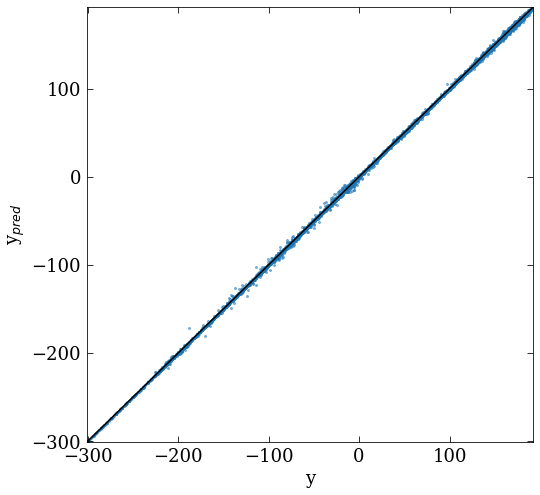

In [47]:

plt.figure(figsize=(8, 8))

plt.scatter(y, y_pred, alpha=0.5, s=4)

xx = np.linspace(ymin, ymax, 50)
plt.plot(xx, xx, color='k')

plt.xlabel('y')
plt.ylabel(r'y$_{pred}$')
plt.xlim(ymin, ymax)
plt.ylim(ymin, ymax)

# MSE

In [50]:
se = (y-y_pred)**2
np.mean(se), np.mean(se[(y > 0) & (y_pred > 0)])

(1.0669215, 0.99224406)

In [51]:
se.min(), se.max()

(0.0, 289.866)